In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [253]:
def steer_angle(t):
    if t < 1:
        return 0
    elif (t>= 1) and (t<=9):
        return np.deg2rad(2) * (t-1)
    else:
        return np.deg2rad(2) * 8

def lateral_model(t, yd0, Fyf_func, Fyr_func):
    m = 1800
    vx = 100/3.6
    Iz = 2500
    l1 = 0.5*2.7
    l2 = 2.7 - l1

    y, theta, vy_d0, omega_d0 = yd0

    vy_f = vy_d0 + l1*omega_d0
    vy_r = -vy_d0 + l2*omega_d0

    delta_f = -steer_angle(t)

    alpha_f = -(vy_f / vx) + 0
    alpha_r = (vy_r / vx)

    Fyf = Fyf_func(alpha_f)
    Fyr = Fyr_func(alpha_r)

    vy_d1 = (Fyf*np.cos(delta_f) + Fyr - m*vx*omega_d0) / m
    omega_d1 = (l1*Fyf*np.cos(delta_f) - l2*Fyr) / Iz

    return np.array([vy_d0, omega_d0, vy_d1, omega_d1])


In [258]:
yd0 = np.array([0, 0, 0, 0.1])
t_end = 10
time_array = np.arange(0, t_end, 1e-3)

soln = solve_ivp(
    lateral_model,
    [0, t_end],
    yd0,
    method="RK45",
    dense_output=True,
    args=(lambda alpha: 1*alpha*2e4, lambda alpha: 1.2*alpha*2e4),
)


In [259]:
y = soln.sol(time_array).T

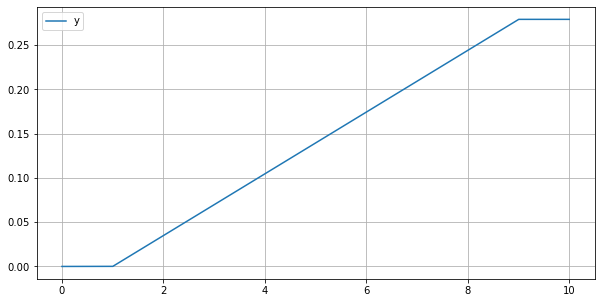

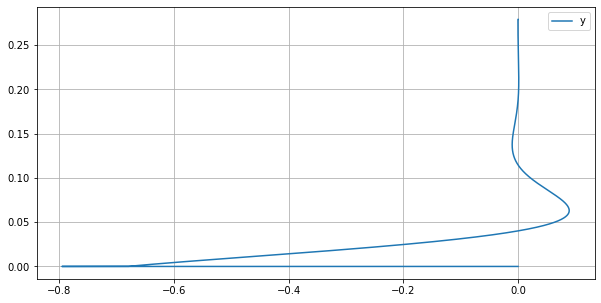

In [260]:
plt.figure(figsize=(10,5))
plt.plot(time_array, [steer_angle(t) for t in time_array], label="y")
plt.legend()
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(y[:,2], [steer_angle(t) for t in time_array], label="y")
plt.legend()
plt.grid()

plt.show()

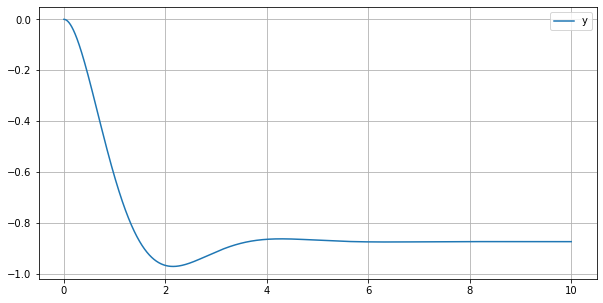

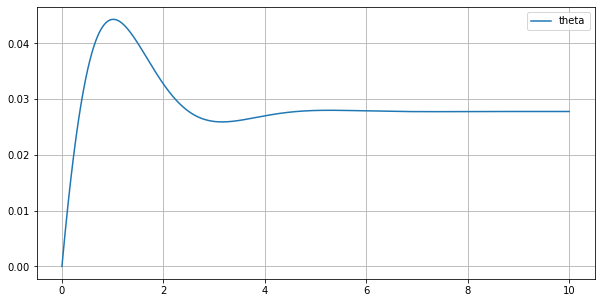

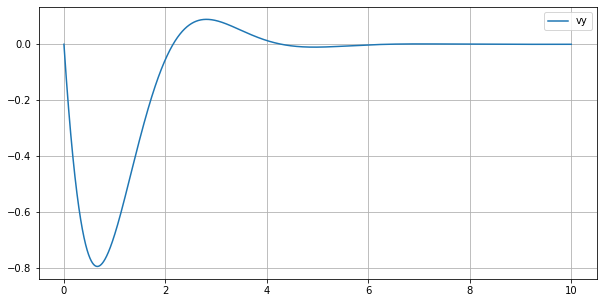

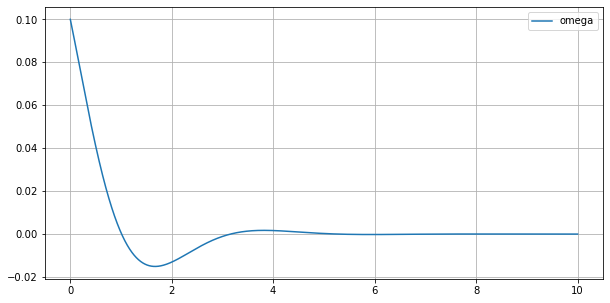

In [261]:
plt.figure(figsize=(10,5))
plt.plot(time_array, y[:,0], label="y")
plt.legend()
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(time_array, y[:,1], label="theta")
plt.legend()
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(time_array, y[:,2], label="vy")
plt.legend()
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(time_array, y[:,3], label="omega")
plt.legend()
plt.grid()

plt.show()

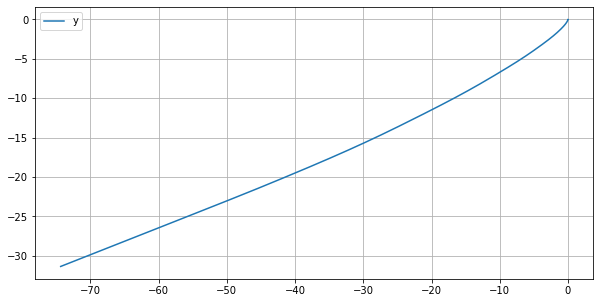

In [252]:
plt.figure(figsize=(10,5))
plt.plot(y[:,1], y[:,3], label="y")
plt.legend()
plt.grid()


plt.show()

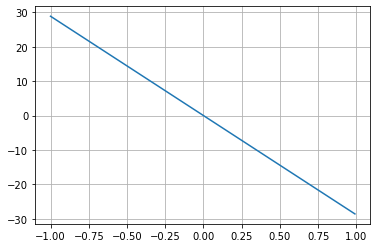

In [163]:
tire_f = lambda alpha: alpha*8e4*1.5
tire_r = lambda alpha: alpha*8e4
vals = [lateral_model(0, [0,0,0,i], tire_f, tire_r)[2] for i in np.arange(-1, 1, 1e-2)]

plt.plot(np.arange(-1, 1, 1e-2), vals)
plt.grid()
plt.show()